In [1]:
import numpy as np
import pandas as pd

Создадим датасет и убедимся в целостности данных

In [3]:
data = pd.read_csv('C:\\Users\\Mell\\Desktop\\test_pandas.csv')

In [5]:
data.head(5)

,uid,price_per_job,jobs_made
0,3,0.03,1
1,3,0.10,2
2,3,0.10,2
3,3,0.15,1
4,3,1.00,4


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79524 entries, 0 to 79523
Data columns (total 3 columns):
uid              79524 non-null int64
price_per_job    79524 non-null float64
jobs_made        79524 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.8 MB


**Получим и сохраним ведомость оплаты**

In [9]:
data['amount'] = data['price_per_job'] * data['jobs_made']
table_of_payment = data.groupby(by=['uid'], as_index=False)['amount'].sum()
table_of_payment.head(5)

,uid,amount
0,3,8.88
1,5,100.10
2,35,31553.60
3,67,40.70
4,68,170.35


In [11]:
table_of_payment.to_csv("C:\\Users\\Mell\\Desktop\\table_of_payment.csv",header=True,index=False)

**Теперь определим тех, кто заработал больше всех и в сумме заработал 60% денег**

Отсортируем таблицу по значению amount

In [13]:
table_of_payment = table_of_payment.sort_values(by='amount', ascending=False)

Найдем сколько величину составляющую 60% от общей суммы amount

In [15]:
target = float((table_of_payment['amount'].sum())*0.6)
target

1108815.2580000001

Создадим еще один стобец с кумулятивной суммой и оставим только те значения, которые меньше или равны значения target

In [19]:
table_of_payment['cum_sum'] = table_of_payment['amount'].cumsum()
most_significant = table_of_payment[table_of_payment['cum_sum'] <= target].loc[:,'uid']
most_significant.head(10)

7         196
52       6239
51       6236
34       2901
90     112445
183    156277
2          35
96     117313
56       7715
19       1132
Name: uid, dtype: int64

Сохраним полученные значения

In [20]:
most_significant.to_csv("C:\\Users\\Mell\\Desktop\\most_significant.csv",header=True,index=False)

**Теперь займемся поиском тех, кто заработал аномально больше других**

Для начала посмотрим как распределены значения цены за работу и количества выполненных работ

In [24]:
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns

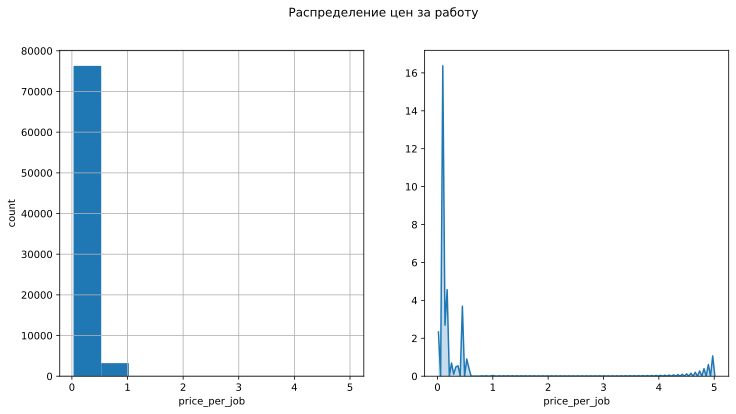

In [44]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
data['price_per_job'].hist()
plt.ylabel('count')
plt.xlabel('price_per_job')

plt.subplot(122)
sns.kdeplot(data['price_per_job'], shade=True, legend=False)
plt.xlabel('price_per_job')

plt.suptitle('Распределение цен за работу')
plt.show()

Конечно не зная ценовой политики данного датасета, я не могу на 100% утверждать о наличии выбросов. Но на данном этапе я приму некторые значения как выбросы.

In [40]:
data.loc[data['price_per_job'] > 0.8]

,uid,price_per_job,jobs_made,earnings,amount
4,3,1.0,4,4.0,4.0
5,3,1.0,1,1.0,1.0
6,3,1.0,3,3.0,3.0
19,5,1.0,11,11.0,11.0
20,5,1.0,4,4.0,4.0
...,...,...,...,...,...
10755,150772,1.0,131,131.0,131.0
11890,156275,1.0,3,3.0,3.0
12709,160244,5.0,113,565.0,565.0
13000,160256,5.0,26,130.0,130.0


Мы видим **135** подозрительных значений, построим распределения без них.


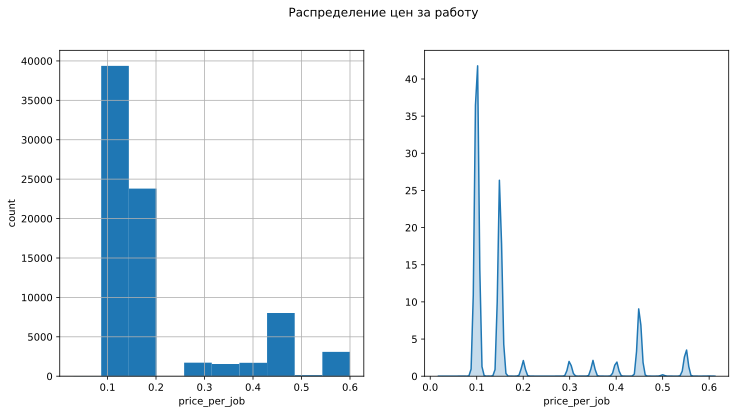

In [43]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
data['price_per_job'].loc[data['price_per_job']<0.8].hist()
plt.ylabel('count')
plt.xlabel('price_per_job')

plt.subplot(122)
sns.kdeplot(data['price_per_job'].loc[data['price_per_job']<0.8], shade=True, legend=False)
plt.xlabel('price_per_job')

plt.suptitle('Распределение цен за работу')
plt.show()

Теперь проанализируем распределеные выполненных работ

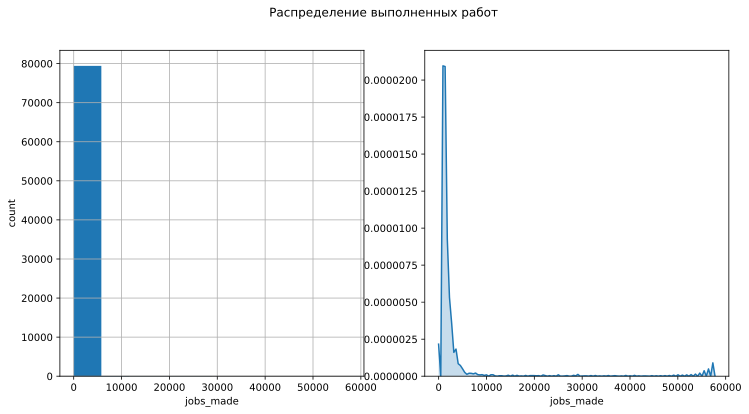

In [48]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
data['jobs_made'].hist()
plt.ylabel('count')
plt.xlabel('jobs_made')

plt.subplot(122)
sns.kdeplot(data['jobs_made'], shade=True, legend=False)
plt.xlabel('jobs_made')

plt.suptitle('Распределение выполненных работ')
plt.show()

Здесь мы видим похожую ситуацию

Оценим квартильный размах

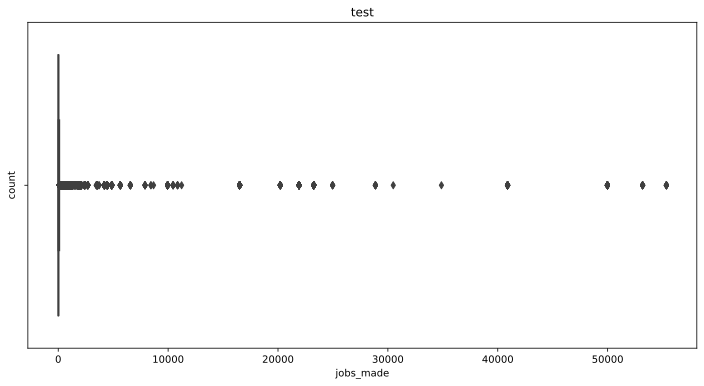

In [79]:
plt.figure(figsize=(12, 6))
sns.boxplot(data['jobs_made'].loc[data['jobs_made']])

plt.xlabel('jobs_made')
plt.ylabel('count')
plt.title('test')
plt.show()

In [55]:
Q1 = np.percentile(data['jobs_made'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['jobs_made'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

63.0

In [57]:
Maximum = Q3 + 1.5*IQR
Maximum

160.5

In [81]:
data.loc[data['jobs_made'] > 160.5]

,uid,price_per_job,jobs_made,earnings,amount
22,35,0.55,458,251.90,251.90
23,35,0.30,350,105.00,105.00
28,35,0.55,503,276.65,276.65
32,35,0.55,386,212.30,212.30
37,35,0.55,730,401.50,401.50
...,...,...,...,...,...
79487,270258,0.10,170,17.00,17.00
79505,196,0.20,249,49.80,49.80
79514,6236,0.20,193,38.60,38.60
79515,6239,0.20,536,107.20,107.20


Как видно, значений выходящих за 1.5 межкварптильного расстояния от Q3 слишком много, нельзя их просто удалять. 

Посмотрим сколько значений jobs_made лежит за 3мя стандартными отклонениями

In [78]:
data_std = np.std(data['jobs_made'])
data_std

910.3775664177921

In [77]:
data_mean = np.mean(data['jobs_made'])
data_mean

139.27037120869173

In [83]:
data.loc[data['jobs_made'] > (data_mean + 3*data_std)]

,uid,price_per_job,jobs_made,earnings,amount
199,35,0.35,4463,1562.05,1562.05
211,35,0.20,4189,837.80,837.80
212,35,0.20,21914,4382.80,4382.80
213,35,0.20,16504,3300.80,3300.80
214,35,0.20,9949,1989.80,1989.80
...,...,...,...,...,...
71012,265500,0.10,3451,345.10,345.10
72077,266293,0.10,3811,381.10,381.10
72265,266432,0.10,3536,353.60,353.60
74161,267159,0.10,4983,498.30,498.30


Исключим эти значения и вновь посмотрим на распределение случайное величины.

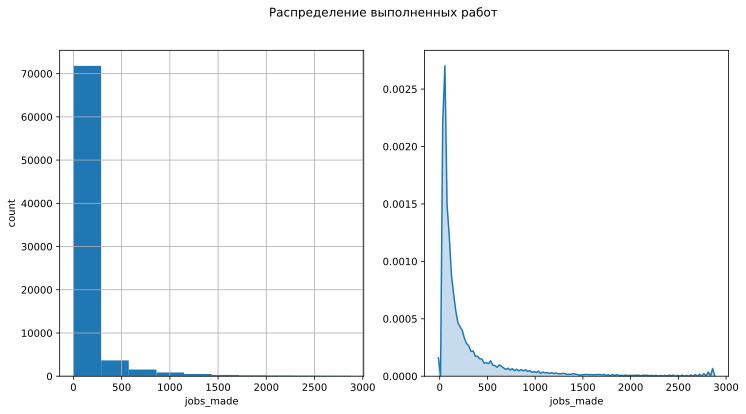

In [84]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
data['jobs_made'].loc[data['jobs_made'] < (data_mean + 3*data_std)].hist()
plt.ylabel('count')
plt.xlabel('jobs_made')

plt.subplot(122)
sns.kdeplot(data['jobs_made'].loc[data['jobs_made'] < (data_mean + 3*data_std)], shade=True, legend=False)
plt.xlabel('jobs_made')

plt.suptitle('Распределение выполненных работ')
plt.show()

**Объеденим и сохраним данные которые посчитали подозрительными.**

In [104]:
for_information = data.loc[(data['price_per_job'] > 0.8) | (data['jobs_made'] > (data_mean + 3*data_std))]

In [105]:
for_information.to_csv("C:\\Users\\Mell\\Desktop\\for_information.csv",header=True,index=False)